In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({"text.usetex": True, "font.family": "Times"})

In [30]:
df = pd.read_csv("../data/data.csv", skiprows=1)

In [31]:
df

,group,z,theta,z_dot,theta_dot,u
0,0,0.505120,0.118475,-0.037783,0.034822,-2.284305
1,0,0.503839,0.119656,-0.114816,0.183570,-1.305950
2,0,0.499947,0.125878,-0.158685,0.199008,-0.385911
3,0,0.494568,0.132625,-0.171350,0.082270,0.440852
4,0,0.488760,0.135413,-0.155972,-0.154596,1.147489
...,...,...,...,...,...,...
29995,499,-0.017178,-2.984932,-0.032784,-0.874768,-0.544579
29996,499,-0.018289,-3.014586,-0.050738,-0.738169,0.000405
29997,499,-0.020009,-3.039608,-0.050312,-0.567993,0.698512
29998,499,-0.021715,-3.058862,-0.026302,-0.337031,1.591451


In [32]:
feat_names = {"z" : r"$z$",
              "z_dot" : r"$\dot{z}$",
              "theta" : r"$\theta$",
              "theta_dot" : r"$\dot{\theta}$",
              "u" : r"$u$"}
print("Feat. & Mean & Std. Dev. & Min. & 25\% & 50\% & 75\% & Max. \\\\ \\hline")
for col in df.drop(columns=["group"]).columns:
    stats = df[col].describe()
    print(feat_names[col] + " & " + " & ".join(list("{:.02f}".format(num) for num in stats.to_numpy()[1:])) + " \\\\")

Feat. & Mean & Std. Dev. & Min. & 25\% & 50\% & 75\% & Max. \\ \hline
$z$ & 0.13 & 0.70 & -1.99 & -0.17 & 0.04 & 0.46 & 1.99 \\
$\theta$ & -0.50 & 1.41 & -3.13 & -1.41 & -0.19 & 0.40 & 1.78 \\
$\dot{z}$ & -0.00 & 0.72 & -2.02 & -0.40 & -0.02 & 0.48 & 1.79 \\
$\dot{\theta}$ & -1.52 & 4.65 & -11.37 & -3.71 & -1.27 & 1.12 & 8.27 \\
$u$ & 0.00 & 2.15 & -5.72 & -1.40 & -0.13 & 1.46 & 5.86 \\


In [33]:
#pd.plotting.scatter_matrix(df.drop(columns=["group"]), alpha=0.1, diagonal="kde", figsize=(20,20), c=df["u"] > 0, cmap="cool", vmin=-0.5, vmax=1.5);

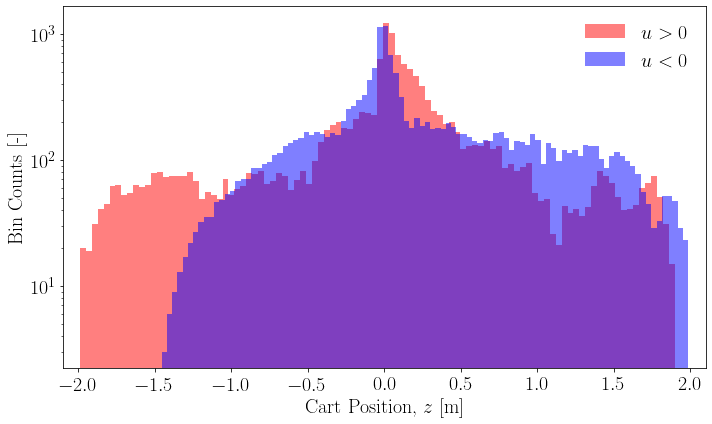

In [34]:
plt.figure(figsize=(10,6))
plt.hist(df["z"][df["u"] > 0], alpha=0.5, color="red", label=r"$u > 0$", bins=100)
plt.hist(df["z"][df["u"] < 0], alpha=0.5, color="blue", label=r"$u < 0$", bins=100)
plt.semilogy()
plt.legend(frameon=False, fontsize=20)
plt.xlabel(r"Cart Position, $z$ [m]", fontsize=20)
plt.ylabel("Bin Counts [-]", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-2.1, 2.1])
plt.tight_layout()
plt.savefig("../figures/eda/z_hist.png", dpi=500)

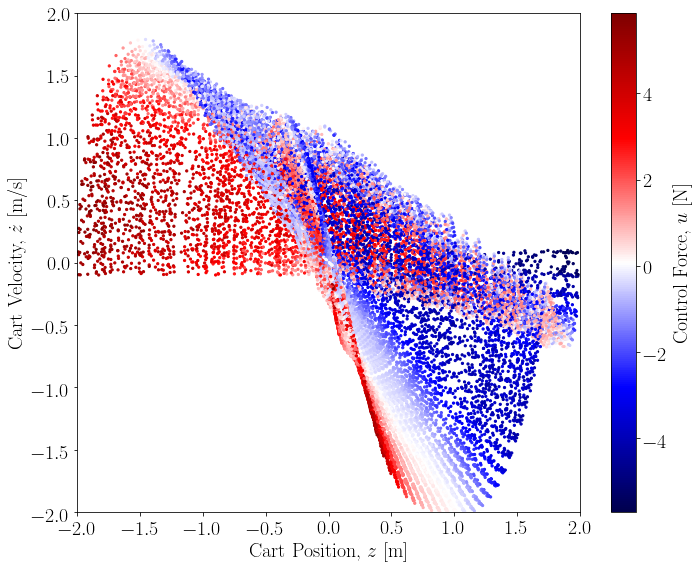

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(df["z"], df["z_dot"], c=df["u"], alpha=1, marker=".", s=20, cmap="seismic")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel(r"Control Force, $u$ [N]", rotation=90, fontsize=20)
plt.xlabel(r"Cart Position, $z$ [m]", fontsize=20)
plt.ylabel(r"Cart Velocity, $\dot{z}$ [m/s]", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.tight_layout()
plt.savefig("../figures/eda/z_z_dot_scatter.png", dpi=500)

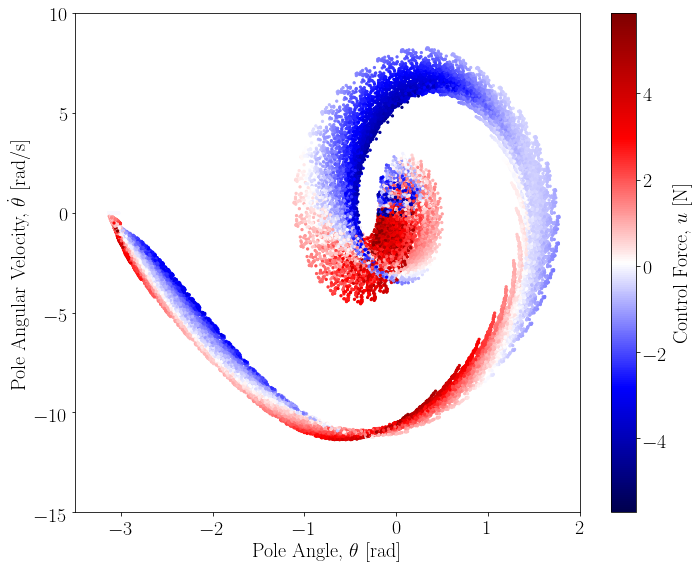

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(df["theta"], df["theta_dot"], alpha=1, c=df["u"], marker=".", s=20, cmap="seismic")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel(r"Control Force, $u$ [N]", rotation=90, fontsize=20)
plt.xlabel(r"Pole Angle, $\theta$ [rad]", fontsize=20)
plt.ylabel(r"Pole Angular Velocity, $\dot{\theta}$ [rad/s]", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-3.5, 2])
plt.ylim([-15, 10])
plt.tight_layout()
plt.savefig("../figures/eda/theta_theta_dot_scatter.png", dpi=500)